# 02 - Exploratory Data Analysis (EDA)

This notebook performs comprehensive EDA including:
- Distribution analysis
- Correlation analysis
- Temporal patterns
- Feature relationships
- Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Preprocessed Data

In [2]:
# Load cleaned data
df = pd.read_csv('../processed_data/steel_data_cleaned.csv', parse_dates=['date'])

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (35040, 11)

Columns: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0,Weekday,Monday,Light_Load
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
2,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
3,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
4,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load


## Target Variable Analysis

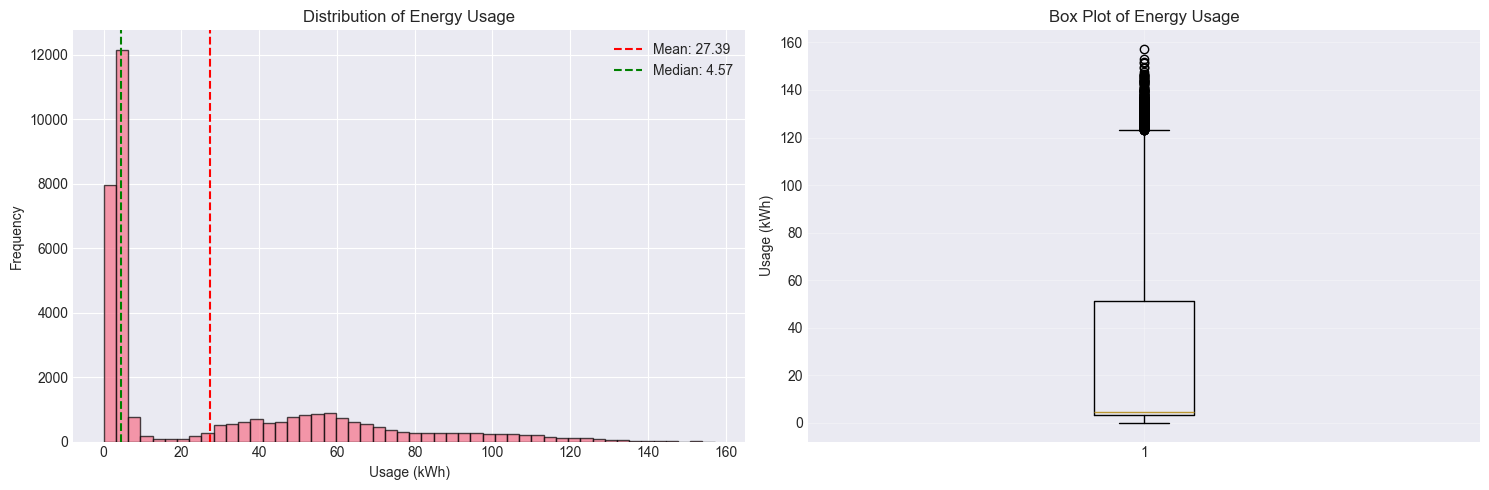


Usage_kWh Statistics:
count    35040.000000
mean        27.386892
std         33.444380
min          0.000000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64


In [3]:
# Distribution of Usage_kWh
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Usage_kWh'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Usage (kWh)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Energy Usage')
axes[0].axvline(df['Usage_kWh'].mean(), color='red', linestyle='--', label=f'Mean: {df["Usage_kWh"].mean():.2f}')
axes[0].axvline(df['Usage_kWh'].median(), color='green', linestyle='--', label=f'Median: {df["Usage_kWh"].median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['Usage_kWh'], vert=True)
axes[1].set_ylabel('Usage (kWh)')
axes[1].set_title('Box Plot of Energy Usage')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nUsage_kWh Statistics:")
print(df['Usage_kWh'].describe())

## Temporal Analysis

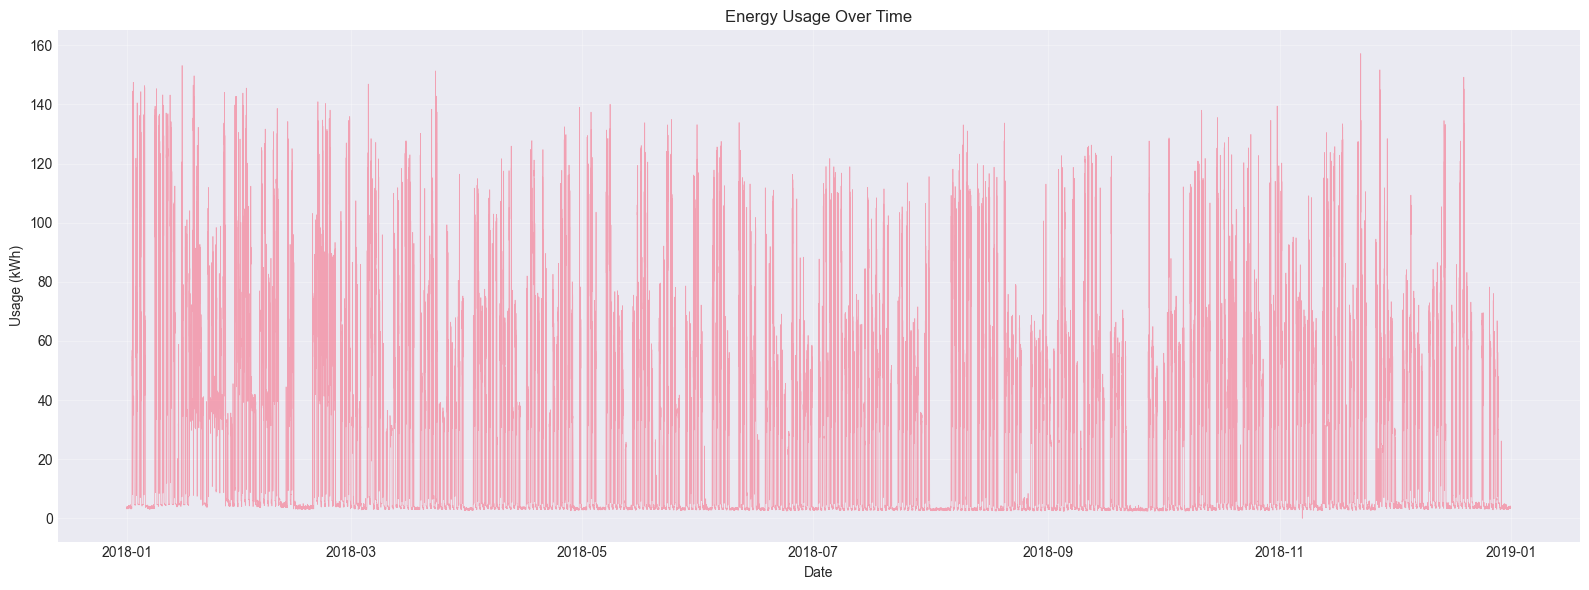

In [4]:
# Energy usage over time
plt.figure(figsize=(16, 6))
plt.plot(df['date'], df['Usage_kWh'], alpha=0.6, linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.title('Energy Usage Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

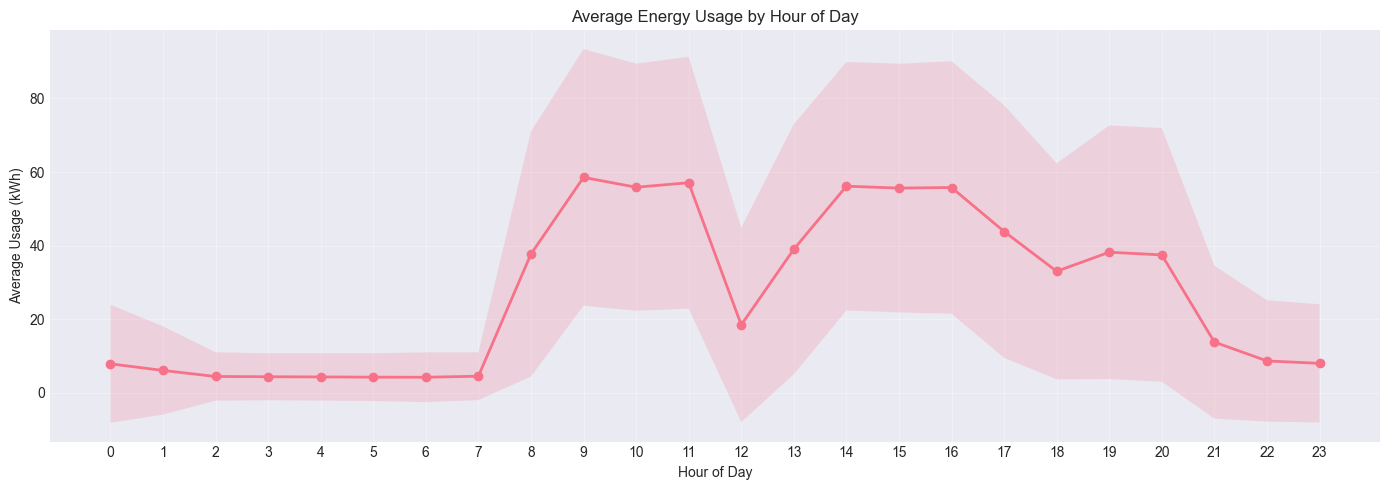

In [5]:
# Extract time features for analysis
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

# Hourly pattern
hourly_avg = df.groupby('hour')['Usage_kWh'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 5))
plt.plot(hourly_avg['hour'], hourly_avg['mean'], marker='o', linewidth=2, markersize=6)
plt.fill_between(hourly_avg['hour'], 
                 hourly_avg['mean'] - hourly_avg['std'], 
                 hourly_avg['mean'] + hourly_avg['std'], 
                 alpha=0.2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.title('Average Energy Usage by Hour of Day')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

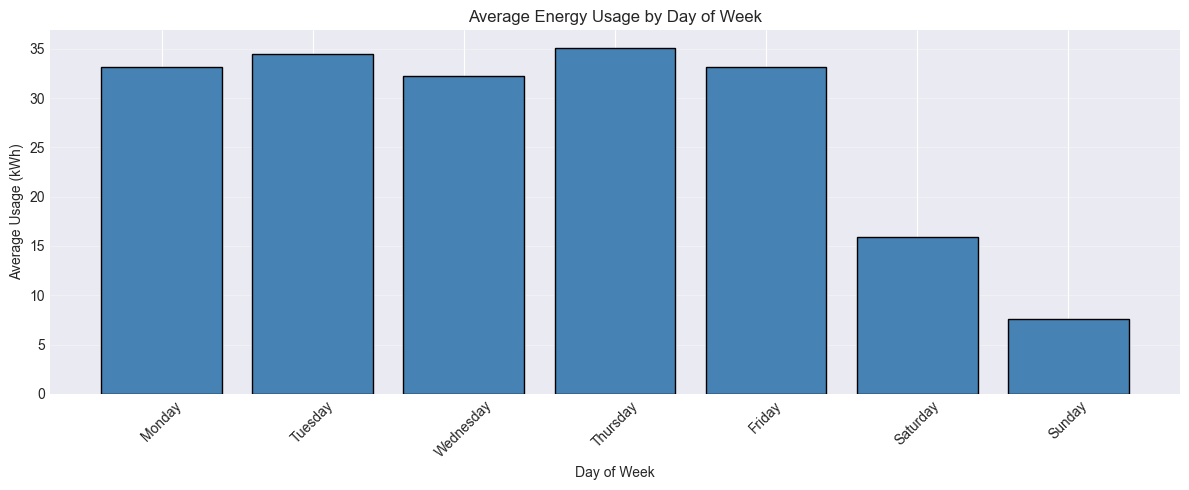

In [6]:
# Day of week pattern
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('dayofweek')['Usage_kWh'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.bar(daily_avg['dayofweek'], daily_avg['Usage_kWh'], color='steelblue', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Average Usage (kWh)')
plt.title('Average Energy Usage by Day of Week')
plt.xticks(range(7), day_names, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

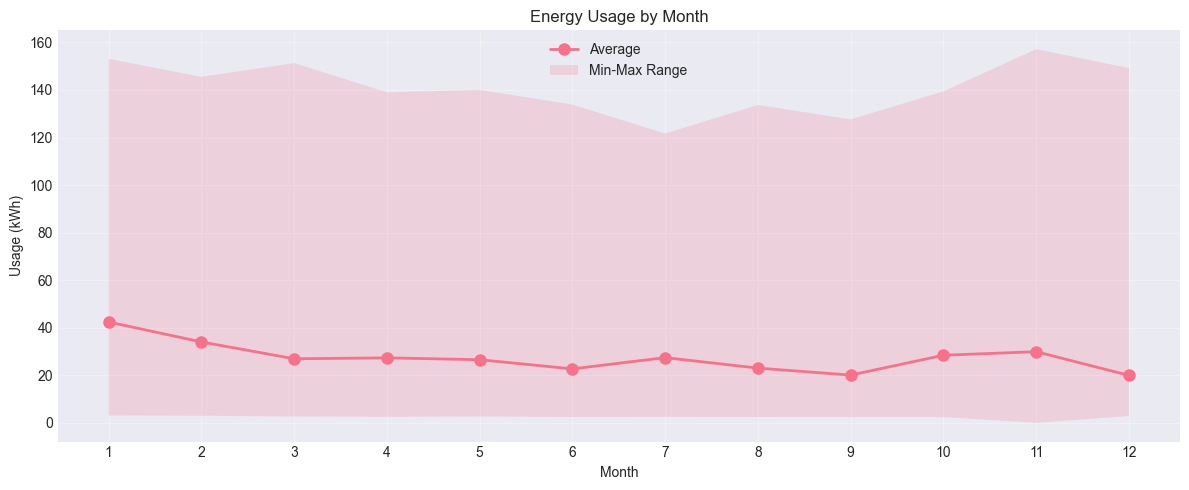

In [7]:
# Monthly pattern
monthly_avg = df.groupby('month')['Usage_kWh'].agg(['mean', 'min', 'max']).reset_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg['month'], monthly_avg['mean'], marker='o', linewidth=2, markersize=8, label='Average')
plt.fill_between(monthly_avg['month'], monthly_avg['min'], monthly_avg['max'], alpha=0.2, label='Min-Max Range')
plt.xlabel('Month')
plt.ylabel('Usage (kWh)')
plt.title('Energy Usage by Month')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Categorical Feature Analysis

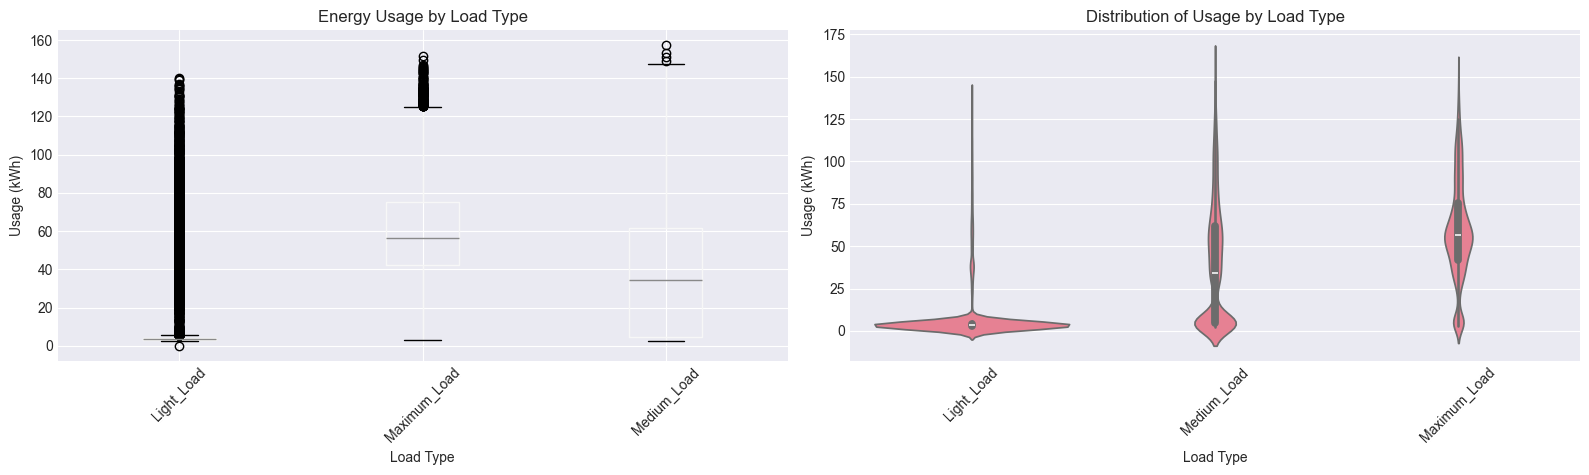


Average Usage by Load Type:
                   mean  median        std  count
Load_Type                                        
Light_Load     8.626207   3.310  17.906245  18072
Maximum_Load  59.265314  56.630  29.749700   7272
Medium_Load   38.445394  34.435  35.220166   9696


In [8]:
# Usage by Load Type
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Box plot
df.boxplot(column='Usage_kWh', by='Load_Type', ax=axes[0])
axes[0].set_xlabel('Load Type')
axes[0].set_ylabel('Usage (kWh)')
axes[0].set_title('Energy Usage by Load Type')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Violin plot
sns.violinplot(data=df, x='Load_Type', y='Usage_kWh', ax=axes[1])
axes[1].set_xlabel('Load Type')
axes[1].set_ylabel('Usage (kWh)')
axes[1].set_title('Distribution of Usage by Load Type')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nAverage Usage by Load Type:")
print(df.groupby('Load_Type')['Usage_kWh'].agg(['mean', 'median', 'std', 'count']))

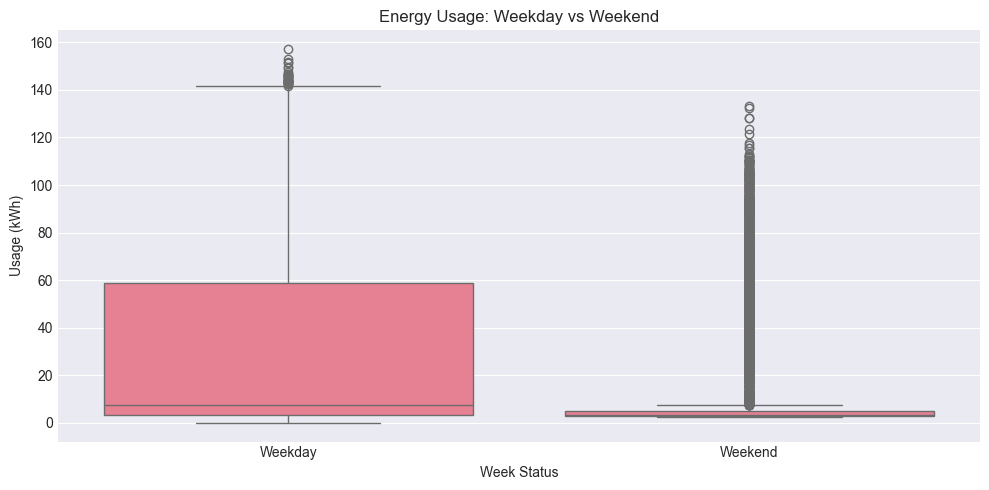


Average Usage by Week Status:
                 mean  median        std
WeekStatus                              
Weekday     33.624727    7.60  35.624802
Weekend     11.732327    3.46  19.947867


In [9]:
# Usage by Week Status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='WeekStatus', y='Usage_kWh')
plt.xlabel('Week Status')
plt.ylabel('Usage (kWh)')
plt.title('Energy Usage: Weekday vs Weekend')
plt.tight_layout()
plt.show()

print("\nAverage Usage by Week Status:")
print(df.groupby('WeekStatus')['Usage_kWh'].agg(['mean', 'median', 'std']))

## Correlation Analysis

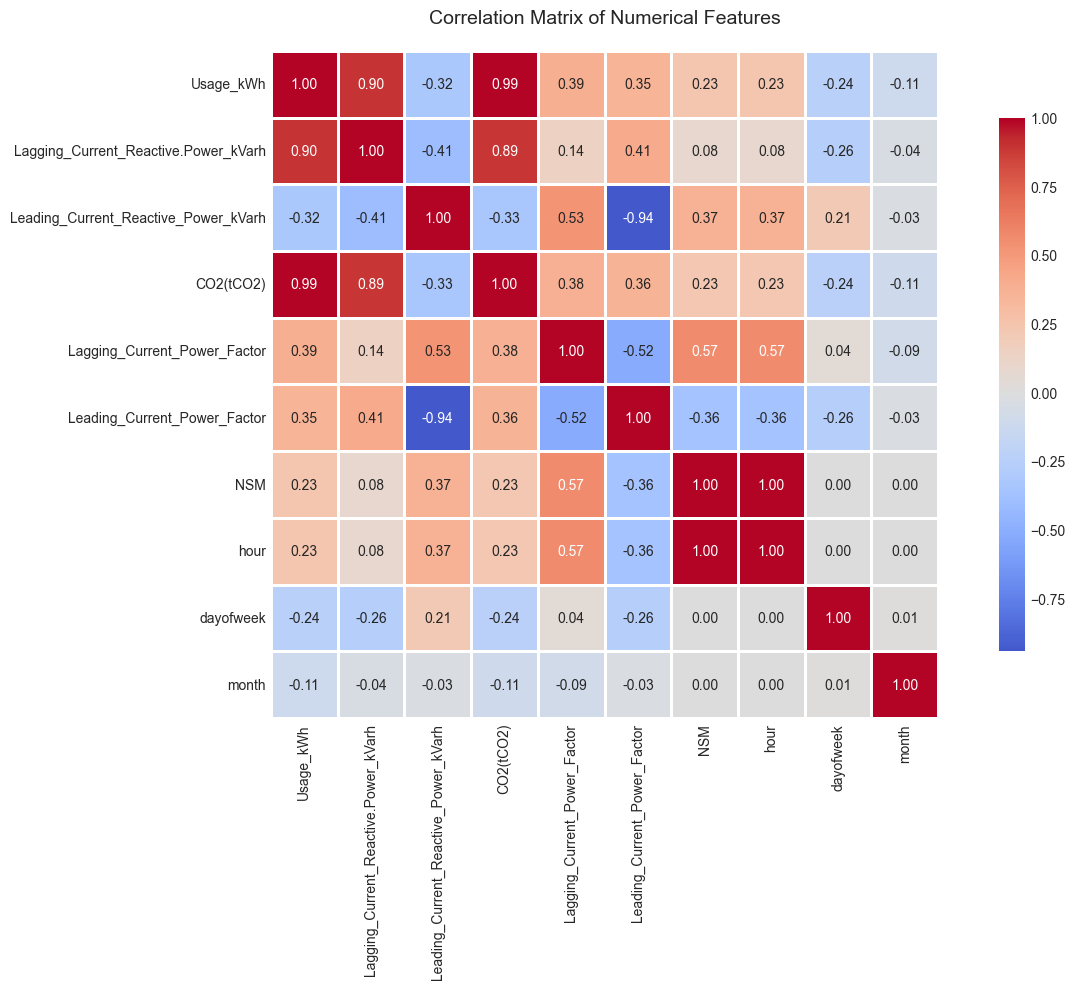


Correlation with target variable (Usage_kWh):
Usage_kWh                               1.000000
CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896150
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
hour                                    0.234175
month                                  -0.113961
dayofweek                              -0.240705
Leading_Current_Reactive_Power_kVarh   -0.324922
Name: Usage_kWh, dtype: float64


In [10]:
# Select numeric columns for correlation
numeric_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 
                'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 
                'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 
                'NSM', 'hour', 'dayofweek', 'month']

# Correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with target variable (Usage_kWh):")
target_corr = correlation_matrix['Usage_kWh'].sort_values(ascending=False)
print(target_corr)

## Feature Relationships with Target

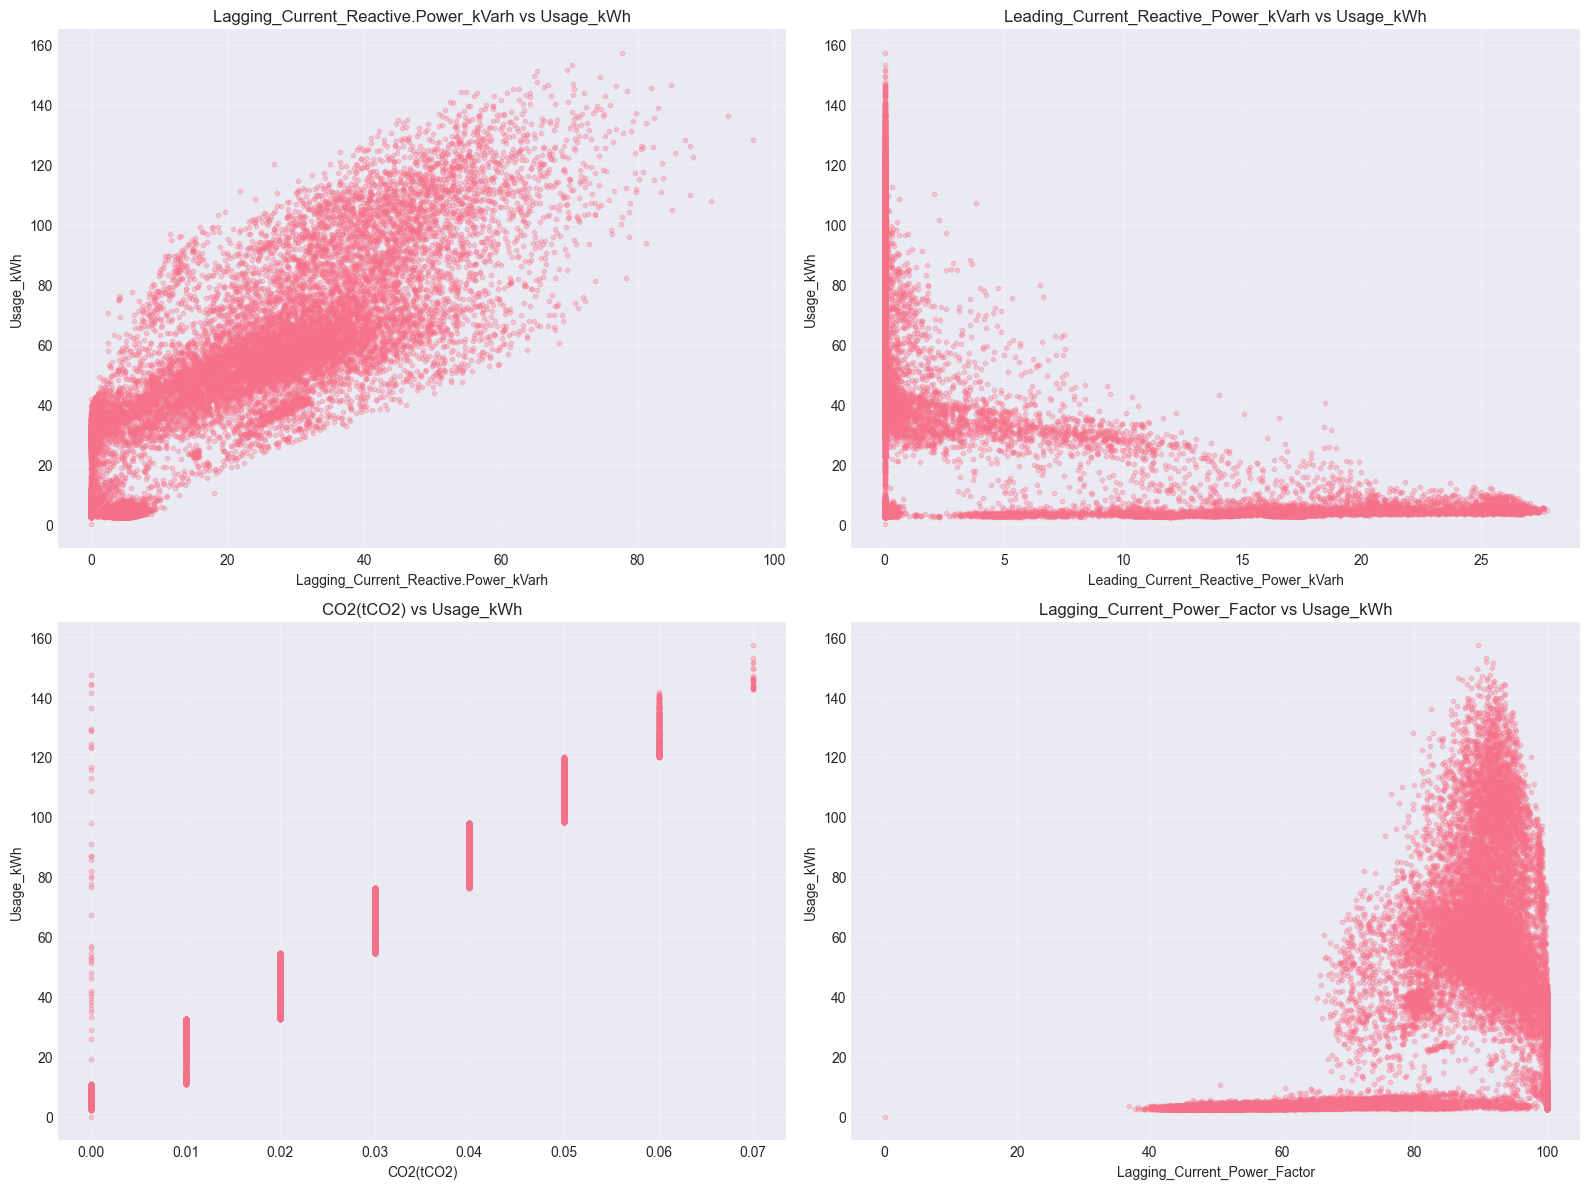

In [11]:
# Scatter plots of key features vs Usage
key_features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                'CO2(tCO2)', 'Lagging_Current_Power_Factor']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].scatter(df[feature], df['Usage_kWh'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Usage_kWh')
    axes[idx].set_title(f'{feature} vs Usage_kWh')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Power Factor Analysis

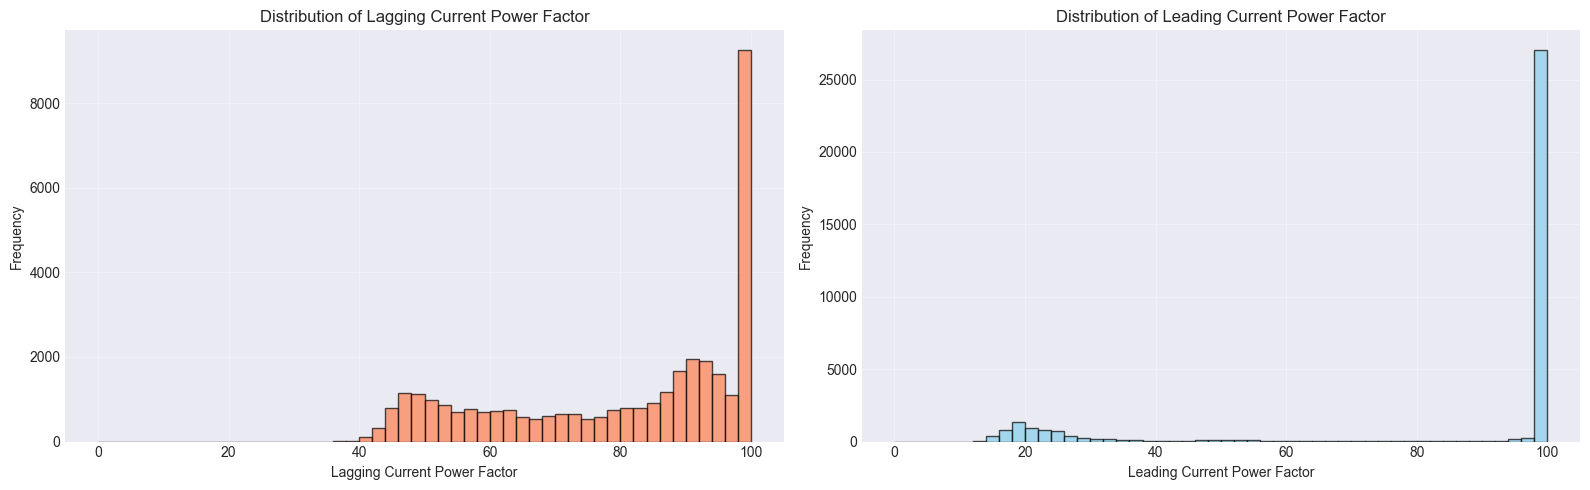

In [12]:
# Power factor distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(df['Lagging_Current_Power_Factor'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Lagging Current Power Factor')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Lagging Current Power Factor')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['Leading_Current_Power_Factor'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[1].set_xlabel('Leading Current Power Factor')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Leading Current Power Factor')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## CO2 Emissions Analysis

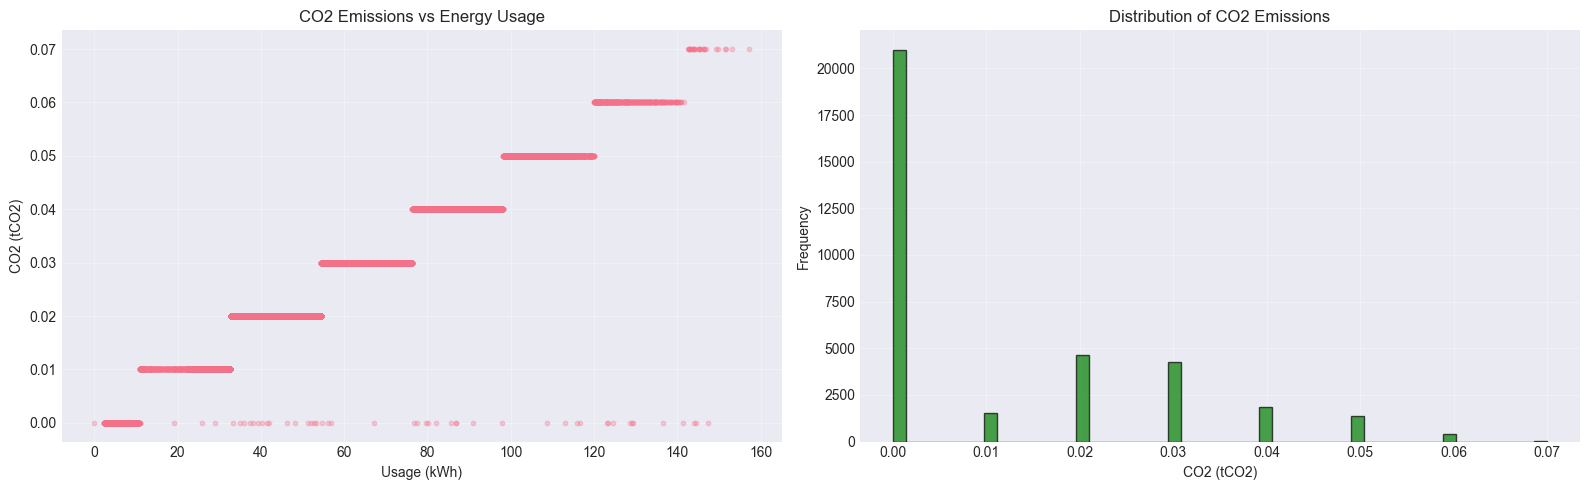


Correlation between Usage and CO2: 0.9882


In [13]:
# CO2 vs Usage relationship
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].scatter(df['Usage_kWh'], df['CO2(tCO2)'], alpha=0.3, s=10)
axes[0].set_xlabel('Usage (kWh)')
axes[0].set_ylabel('CO2 (tCO2)')
axes[0].set_title('CO2 Emissions vs Energy Usage')
axes[0].grid(True, alpha=0.3)

# CO2 distribution
axes[1].hist(df['CO2(tCO2)'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('CO2 (tCO2)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of CO2 Emissions')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCorrelation between Usage and CO2: {df['Usage_kWh'].corr(df['CO2(tCO2)']):.4f}")

## Summary Statistics by Load Type

In [14]:
# Comprehensive summary by Load Type
print("Summary Statistics by Load Type:")
print("="*80)

for load_type in df['Load_Type'].unique():
    print(f"\n{load_type}:")
    subset = df[df['Load_Type'] == load_type]
    print(subset[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 
                  'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)']].describe())
    print(f"\nCount: {len(subset)} records ({len(subset)/len(df)*100:.2f}%)")

Summary Statistics by Load Type:

Light_Load:
          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  18072.000000                          18072.000000   
mean       8.626207                              7.004266   
std       17.906245                             11.683405   
min        0.000000                              0.000000   
25%        2.950000                              3.020000   
50%        3.310000                              4.460000   
75%        4.030000                              5.440000   
max      140.290000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  
count                          18072.000000  18072.000000  
mean                               2.944328      0.002554  
std                                6.402794      0.008726  
min                                0.000000      0.000000  
25%                                0.000000      0.000000  
50%                                0.000000 

## Key Insights

Based on the EDA, we can identify:
1. Temporal patterns in energy usage (hourly, daily, monthly)
2. Strong correlations between certain features and target variable
3. Impact of Load_Type on energy consumption
4. Relationship between reactive power and usage
5. CO2 emissions correlation with usage

These insights will guide feature engineering in the next notebook.